<a href="https://colab.research.google.com/github/sunnysakib/Data_Visualization/blob/main/Simple_Linear_%26_Polynomial_Regression_lab8_2019_3_60_028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Medical Cost Dataset**

In [ ]:
data = pd.read_csv("medical_cost.csv") #load the dataset
data

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [ ]:
data1 = data.drop(['sex', 'region', 'smoker', 'Id'], axis=1)
data1

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [101]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [102]:
data1.isnull().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

In [103]:
data1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

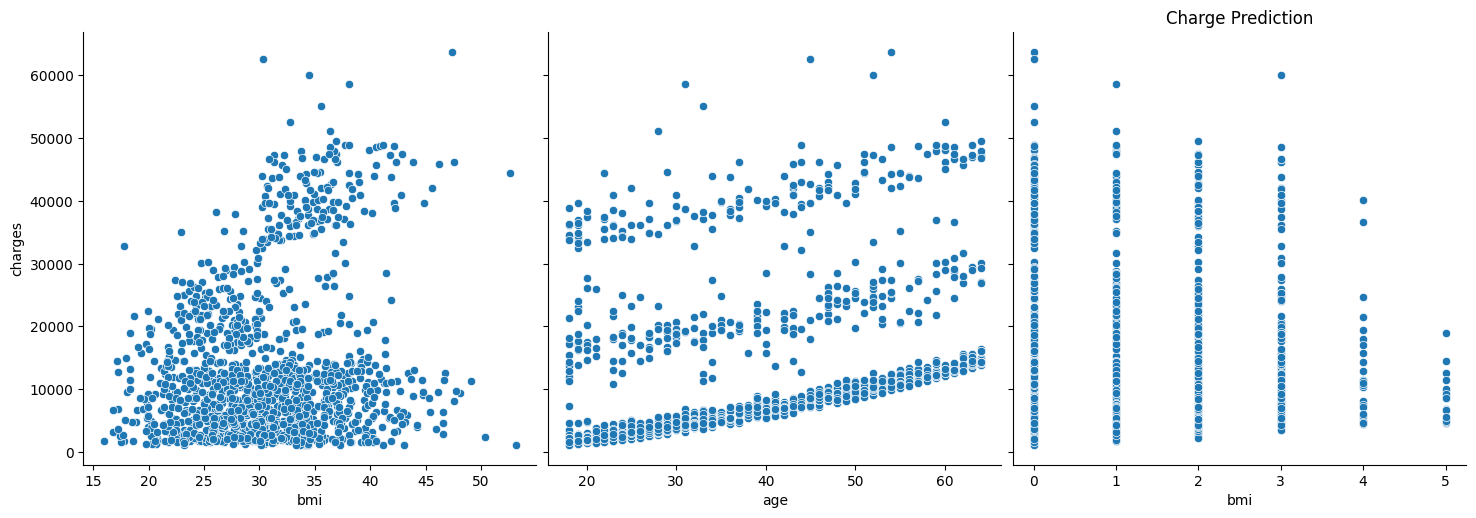

In [104]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['bmi', 'age', 'children'],y_vars=['charges'],size=5,kind='scatter')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('Charge Prediction')
plt.show()

In [106]:
data1.head(3)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


In [118]:
X = data1[['age','bmi','children']]
y = data1['charges']

In [115]:
X = X.values.reshape(-1,1)
X

array([[19.  ],
       [27.9 ],
       [ 0.  ],
       ...,
       [61.  ],
       [29.07],
       [ 0.  ]])

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [122]:
# Split the data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)
print(X_train.shape)
print(y_train.shape)

(936, 3)
(936,)


In [120]:
# Fitting the model
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [123]:
# Predict using test data
y_predict = lr_model.predict(X_test)
y_predict

array([ 9676.57340336,  9867.8860551 , 12868.84958193,  8033.57950569,
        5623.63360332, 17643.66298656, 19021.02882992,  7585.93719558,
       10697.89641019, 20378.19953174, 20179.21011122, 10036.40237202,
       15620.824894  ,  9018.06729344, 14415.09204881, 13292.07151216,
       16459.43897473, 18010.34313028, 12008.41752356, 22875.10820043,
       18849.08668747,  8173.9409489 , 11212.82158556, 12484.93532057,
       18400.25943852, 13317.83080329, 11240.10042671, 20291.6487198 ,
       12763.59747359, 18056.50438262, 23273.47209149,  7220.49291502,
       19907.58024803,  7616.07569748, 13594.81847241, 16315.44536232,
       13291.45346158, 13632.63301961,  8707.69568819, 19366.25202606,
       12827.8924106 , 17047.26185127, 10450.78949898, 13392.37752147,
        5594.75763094, 10262.00093533, 10393.78459579,  8837.62447345,
        7096.38529986, 15922.43856321, 21817.00088936, 12395.31971318,
       10223.97956847, 12946.95087864, 12176.34124732, 18864.90261825,
      

In [124]:
# Predicted Score of train data
train_accuracy = lr_model.score(X_train, y_train)
train_accuracy

0.12358065426242082

In [125]:
test_accuracy = lr_model.score(X_test, y_test)
test_accuracy

0.11011288902870364

In [126]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('Mean absolute error = ', mean_absolute_error(y_test,y_predict))
print('Mean square error = ', mean_squared_error(y_test,y_predict))
print('R2 Score = ', r2_score(y_test,y_predict))

Mean absolute error =  8899.594165897634
Mean square error =  129209552.77458598
R2 Score =  0.11011288902870364


# **Polynomial Regression**

In [127]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =2)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [128]:
predict_train_poly = model.predict(x_train_poly)
predict_train_poly

array([15485.41630565, 15447.03843278, 14317.20076009,  9440.42942704,
       12874.44559113, 11229.83464883, 19857.19877828, 13843.32759865,
       16587.40206734, 15249.13184442, 14593.91545784, 10197.46490246,
       14979.68514232, 10055.9654713 , 11371.22085138, 12198.81302469,
       11636.33224622,  6020.00640723, 18842.71206616, 12713.68408283,
       10932.37144236, 18775.11663761, 18629.02311366,  6664.64902115,
       18449.52074481, 11830.37386361, 12516.9502117 , 14008.06073133,
       10673.28034483, 14444.20042765, 13955.9602873 ,  9510.25409701,
       11760.75199551,  9682.16668994, 23297.30323883, 19641.33178349,
       13777.07985488, 14110.03460635, 10817.05964401, 10282.09889666,
       14374.30332351, 14215.74796025, 16656.14570277,  9726.47127927,
        7612.84180474,  6480.61066483, 11904.04113037,  5171.66879447,
       13294.96553695, 10658.36702486, 13650.59329457, 17241.65555168,
        9386.50877637,  6708.53093926,  9144.17911569, 18211.08900784,
      

In [129]:
predict_test_poly = model.predict(x_test_poly)
predict_test_poly

array([ 9904.55286755, 10321.27989096, 11631.56372805,  8806.40139951,
        6275.47168776, 19358.5463879 , 19500.08731982,  8820.22080178,
       10491.47160974, 20058.4086517 , 17955.21577191, 10963.64317075,
       15378.50864726,  8812.78435492, 14250.89917551, 13817.92926006,
       16031.6499202 , 14965.09311525, 11811.46816192, 19373.64029531,
       17601.30067104,  8718.78913673,  9926.03570845, 12278.7325983 ,
       18705.14445512, 13347.77202231, 10589.41689927, 21622.34202859,
       12620.74429684, 19295.97216626, 19604.65976918,  7824.30111168,
       20800.28128483,  8858.49732113, 13585.21279958, 19355.76421783,
       13416.13681741, 13309.97196371,  7614.37122721, 21450.2968213 ,
       12588.52337145, 15967.04561488,  9981.48352751, 13914.9657609 ,
        6234.5694126 ,  9172.7705858 ,  9141.73249296, 10729.60557928,
        9073.88472967, 13569.15349055, 21190.00750472, 11478.03194437,
        8399.78940706, 12839.12062722, 11807.36616033, 19404.80925346,
      

In [130]:
print(X_train.shape)
print(y_train.shape)

(936, 3)
(936,)


In [150]:
print(predict_train_poly.shape)
print(X_train['age'].shape)

(936,)
(936,)


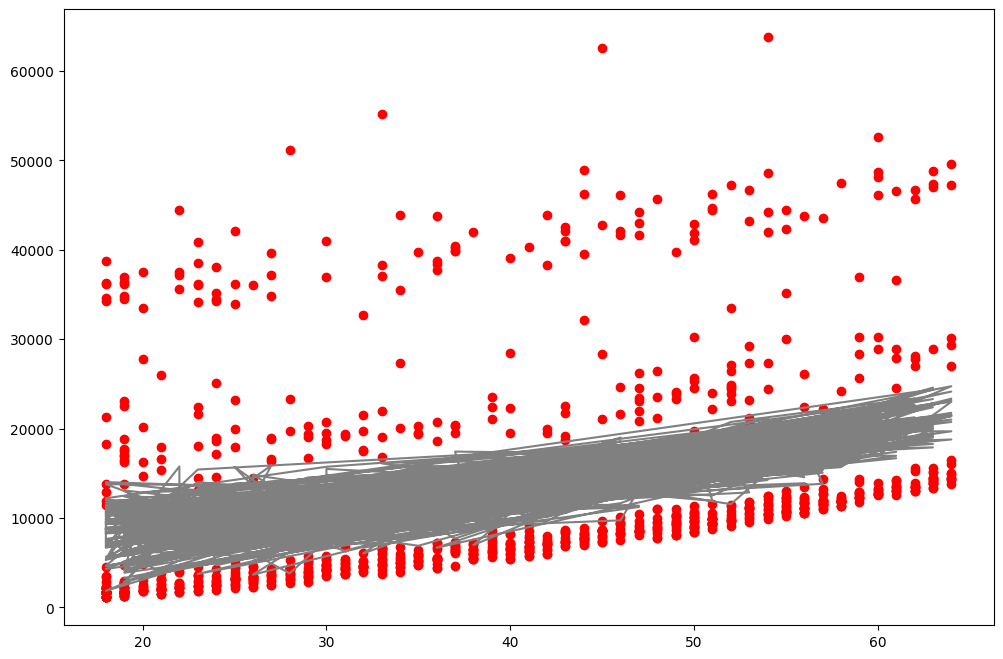

In [157]:
 plt.figure(figsize=(12,8))
 plt.scatter(X_train['age'], y_train, color="red" )
plt.plot(X_train['age'], predict_train_poly, color = 'gray')
plt.show()

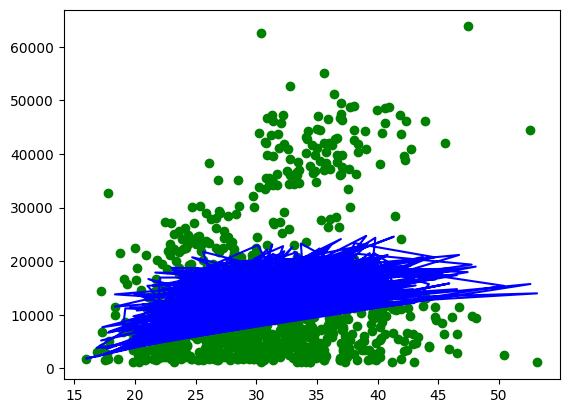

In [139]:
plt.scatter(X_train['bmi'], y_train, color = 'green')
plt.plot(X_train['bmi'], predict_train_poly, color = 'blue')

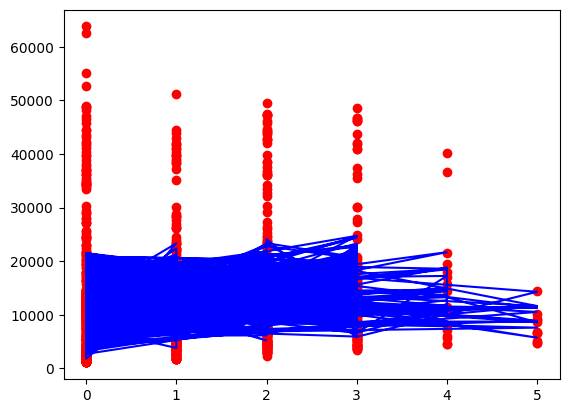

In [140]:
plt.scatter(X_train['children'], y_train, color = 'red')
plt.plot(X_train['children'], predict_train_poly, color = 'blue')

In [142]:
train_accuracy = model.score(x_train_poly, y_train)
train_accuracy

0.13111896199300077

In [143]:
test_accuracy = model.score(x_test_poly, y_test)
test_accuracy

0.1122526041020191

In [144]:
print('Mean absolute error = ', mean_absolute_error( y_test,predict_test_poly))
print('Mean square error = ', mean_squared_error( y_test,predict_test_poly))
print('R2 Score = ', r2_score( y_test,predict_test_poly))

Mean absolute error =  8897.56823617119
Mean square error =  128898871.08892097
R2 Score =  0.1122526041020191


# **Position Salaries Dataset**

In [145]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [146]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

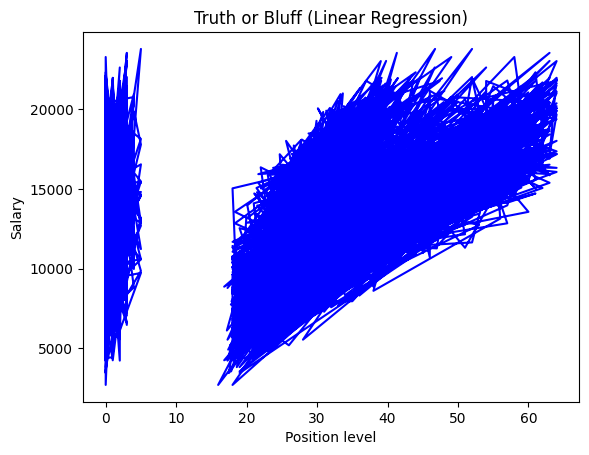

In [147]:
#Visualising the Linear Regression results
# plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()